Analysis of AIS data and Visualization

Danish Maritime Authority, data from 15 march 2024 csv file

In [2]:
#Import Libraries for reading and visualize AIS Data. It takes minutes.

import requests
import folium
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

#Show all columns (27 columns)
pd.set_option('display.max_columns', None)

#Read CSV file
datadkm = pd.read_csv("aisdk-2024-03-15.csv") 
datadkm

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,15/03/2024 00:00:00,Class A,219000615,56.966163,9.218862,Restricted maneuverability,0.0,1.5,66.6,75.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
1,15/03/2024 00:00:00,Base Station,2190064,56.716573,11.519050,Unknown value,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,15/03/2024 00:00:00,Class A,211824000,54.727140,14.531890,Under way using engine,0.0,7.2,258.8,254.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,15/03/2024 00:00:00,Class A,219959000,57.166760,8.513540,Engaged in fishing,NaN,7.3,305.2,299.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
4,15/03/2024 00:00:00,Class A,220307000,57.593842,9.961172,Under way using engine,NaN,0.0,288.8,NaN,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934504,15/03/2024 23:59:58,Class A,219002416,56.153693,10.217275,Under way using engine,0.0,0.0,129.8,217.0,9259238,OURY2,AROS,Tug,NaN,11.0,29.0,GPS,5.0,TOWING IN AARHUS,22/03/2024 22:30:00,AIS,12.0,17.0,5.0,6.0
14934505,15/03/2024 23:59:58,Class A,636022452,57.598907,11.250518,Constrained by her draught,0.0,11.6,308.1,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14934506,15/03/2024 23:59:58,Class A,219000824,55.517007,11.119233,Under way using engine,NaN,0.0,NaN,NaN,Unknown,OU 7852,HJARNO,Cargo,NaN,6.0,15.0,Internal,2.5,HALS,02/10/2024 07:00:00,AIS,4.0,11.0,3.0,3.0
14934507,15/03/2024 23:59:58,Class A,220182000,57.593920,9.962142,Engaged in fishing,NaN,3.8,139.5,132.0,Unknown,OUPH,S549 STEFANIE,Fishing,NaN,6.0,19.0,GPS,4.0,Unknown,NaN,AIS,15.0,4.0,3.0,3.0


In [3]:
#See number of Types of ships

Count_typeship= datadkm['Ship type'].value_counts()

# Convert Count_type in a DataFrame
Count_typeship_df = Count_typeship.reset_index()
Count_typeship_df.columns = ['Ship type', 'Count']

# Print new Count type df DataFrame
Count_typeship_df

,Ship type,Count
0,Cargo,3192628
1,Fishing,3013577
2,Passenger,1816750
3,Undefined,1486994
4,Tanker,1247694
5,Other,695772
6,Tug,555790
7,Dredging,549835
8,Pilot,541633
9,HSC,376686


In [4]:
# Check "Judith" ship

zuri = datadkm[datadkm["Name"] == 'JUDITH']
zuri

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
16171,15/03/2024 00:01:35,Class A,636022452,54.627863,12.332195,Under way using engine,2.2,5.6,236.7,233.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
16921,15/03/2024 00:01:39,Class A,636022452,54.627710,12.331820,Under way using engine,0.0,5.6,236.5,233.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
18627,15/03/2024 00:01:50,Class A,636022452,54.627545,12.331403,Under way using engine,-6.4,5.7,236.5,233.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
20151,15/03/2024 00:01:59,Class A,636022452,54.627418,12.331053,Under way using engine,2.9,5.7,236.3,233.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
21820,15/03/2024 00:02:09,Class A,636022452,54.627272,12.330668,Under way using engine,1.1,5.8,236.2,233.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932946,15/03/2024 23:59:49,Class A,636022452,57.598608,11.251230,Constrained by her draught,2.2,11.6,308.2,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14932949,15/03/2024 23:59:49,Class A,636022452,57.598608,11.251230,Constrained by her draught,2.2,11.6,308.2,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14934285,15/03/2024 23:59:57,Class A,212006000,54.178727,9.466233,Under way using engine,0.0,6.9,69.6,68.0,9359260,5BKY2,JUDITH,Cargo,No additional information,24.0,169.0,GPS,9.1,DKFRC,16/03/2024 15:30:00,AIS,157.0,12.0,12.0,12.0
14934503,15/03/2024 23:59:58,Class A,636022452,57.598907,11.250518,Constrained by her draught,0.0,11.6,308.1,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0


In [5]:
#Because we see strange pattern in Latitude and Longitude in "Judith". We realize there are different MMSI numbers
#We want to know how many "Judith" ships we have in the list

zuri_difIMO= zuri["MMSI"].value_counts()


# Convert Count_type in a DataFrame
zuri_difIMO_df = zuri_difIMO.reset_index()
zuri_difIMO_df.columns = ['MMSI', 'Count']

# Print new Count type df DataFrame
zuri_difIMO_df

,MMSI,Count
0,636022452,21367
1,212006000,179


In [40]:
#See Lat and long of "Judith" all ships to see the strange pattern
trail = zuri[['Latitude', 'Longitude']]
#test= trail.iloc[:20]
trail

,Latitude,Longitude
16171,54.627863,12.332195
16921,54.627710,12.331820
18627,54.627545,12.331403
20151,54.627418,12.331053
21820,54.627272,12.330668
...,...,...
14932946,57.598608,11.251230
14932949,57.598608,11.251230
14934285,54.178727,9.466233
14934503,57.598907,11.250518


In [41]:
#Create a Map with the route of "Judith" routes in Denmark and the strange pattern

mo = folium.Map([30.25802, -110.29487], tiles="Cartodb dark_matter", zoom_start=3)

trail_coordinates = []
for i, row in enumerate(trail.values):
        lat = row[0]
        lon = row[1] 
        tup = (lat,lon)
        trail_coordinates.append(tup)

folium.PolyLine(trail_coordinates, tooltip="Pathway of Zuri").add_to(mo)
mo

In [8]:
#As we checked above, we have two ships with "Judith" name. One is a Bulk Carrier and the other is a Container ship
#Check Bulk Carrier (BC) called "Judith"
JudithBC = datadkm[datadkm["MMSI"] == 636022452]
JudithBC

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
1577,15/03/2024 00:00:09,Class A,636022452,54.628985,12.335112,Under way using engine,-5.4,5.2,237.0,233.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3366,15/03/2024 00:00:19,Class A,636022452,54.628842,12.334732,Under way using engine,-2.2,5.2,237.0,233.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
4882,15/03/2024 00:00:28,Class A,636022452,54.628723,12.334418,Under way using engine,1.1,5.3,237.0,233.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
6837,15/03/2024 00:00:39,Class A,636022452,54.628573,12.334028,Under way using engine,-1.1,5.3,237.0,233.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
8581,15/03/2024 00:00:50,Class A,636022452,54.628435,12.333672,Under way using engine,0.0,5.4,236.9,233.0,Unknown,Unknown,NaN,Undefined,NaN,NaN,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931237,15/03/2024 23:59:39,Class A,636022452,57.598273,11.252017,Constrained by her draught,-2.2,11.6,308.0,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14932946,15/03/2024 23:59:49,Class A,636022452,57.598608,11.251230,Constrained by her draught,2.2,11.6,308.2,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14932949,15/03/2024 23:59:49,Class A,636022452,57.598608,11.251230,Constrained by her draught,2.2,11.6,308.2,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0
14934503,15/03/2024 23:59:58,Class A,636022452,57.598907,11.250518,Constrained by her draught,0.0,11.6,308.1,304.0,9527142,5LIW3,JUDITH,Cargo,NaN,38.0,229.0,GPS,14.4,TR KRB,26/03/2024 18:00:00,AIS,194.0,35.0,23.0,15.0


In [42]:
#Obtain lat and Long to be plot later
trailBC = JudithBC[['Latitude', 'Longitude']]
#test= trail.iloc[:20]
trailBC

,Latitude,Longitude
1577,54.628985,12.335112
3366,54.628842,12.334732
4882,54.628723,12.334418
6837,54.628573,12.334028
8581,54.628435,12.333672
...,...,...
14931237,57.598273,11.252017
14932946,57.598608,11.251230
14932949,57.598608,11.251230
14934503,57.598907,11.250518


In [10]:
mobc = folium.Map([30.25802, -110.29487], tiles="Cartodb dark_matter", zoom_start=3, control_scale=True)

trail_coordinatesbc = []
for i, row in enumerate(trailBC.values):
        lat = row[0]
        lon = row[1] 
        tupbc = (lat,lon)
        trail_coordinatesbc.append(tupbc)

folium.PolyLine(trail_coordinatesbc, tooltip="Pathway of JudithBC").add_to(mobc)
mobc

In [39]:
#Obtain more info from BC Judith (and cleaning)

trailBCsp = JudithBC[['Latitude', 'Longitude', 'SOG', '# Timestamp']]
trailBCsp['# Timestamp'] = trailBCsp['# Timestamp'].str.replace('15/03/2024', '')
trailBCsp

/var/folders/k6/bhl4kx050lj2dhqf6q_jdm9c0000gn/T/ipykernel_5186/1200153148.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Latitude,Longitude,SOG,# Timestamp
1577,54.628985,12.335112,5.2,00:00:09
3366,54.628842,12.334732,5.2,00:00:19
4882,54.628723,12.334418,5.3,00:00:28
6837,54.628573,12.334028,5.3,00:00:39
8581,54.628435,12.333672,5.4,00:00:50
...,...,...,...,...
14931237,57.598273,11.252017,11.6,23:59:39
14932946,57.598608,11.251230,11.6,23:59:49
14932949,57.598608,11.251230,11.6,23:59:49
14934503,57.598907,11.250518,11.6,23:59:58


<Axes: xlabel='# Timestamp'>

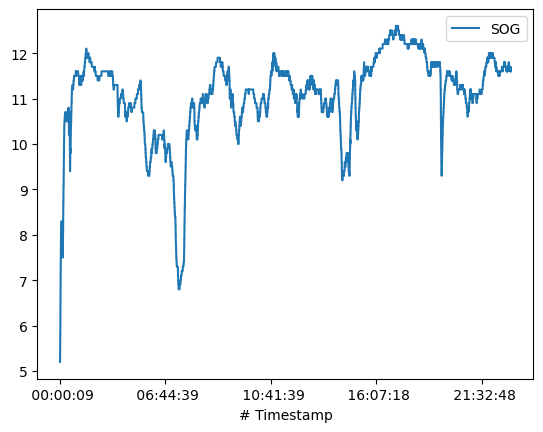

In [43]:
#First plot SOG versus time
trailBCsp.plot( '# Timestamp' , 'SOG' ) 

In [44]:
#2nd plot using Plotly (interactive graph)
#Here is needed to implement iframe render to show the graph (if not, it will be blank)
import plotly.io as pio
pio.renderers.default = "iframe"

import plotly.express as px
fig = px.line(trailBCsp, x="# Timestamp", y="SOG")
fig.show()

In [45]:
#third plot with two graph at the same time , being Lat vs Long and SOG vs time

import plotly.express as px
from plotly.subplots import make_subplots

# Crear la figura de subtramas
figtotal = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Scatter Mapbox", "Line Plot"))

# Primera gráfica - Scatter Mapbox
figtotal.add_trace(
    px.scatter(trailBCsp, x="Longitude", y="Latitude", color="SOG", color_continuous_scale=px.colors.cyclical.IceFire, size_max=20).data[0],
    row=1, col=1
)

# Segunda gráfica - Line Plot
figtotal.add_trace(
    px.line(trailBCsp, x="# Timestamp", y="SOG").data[0],
    row=2, col=1
)

# Actualizar diseño de las subtramas
figtotal.update_layout(height=800, width=800, title_text="Scatter Mapbox and Line Plot Subplots")

# Mostrar la figura
figtotal.show()



In [46]:
#Plot of SOG on the map, where the color represents the speed along the way

import plotly.express as px
fig = px.scatter_mapbox(trailBCsp, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="SOG", 
                        #facet_col="# Timestamp",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=20, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        #title='Judith Bulk Carrier'
                       )

fig.show()

In [47]:
#3D plot of Judith BC with Lat, Long, SOG and Time

fig3d = px.scatter_3d(trailBCsp, 
                      x='Longitude', 
                      y='Latitude', 
                      z='# Timestamp',
                      color='SOG', 
                      #symbol='species'
                     )

fig3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig3d.show()

In [48]:
# Same Plot with Judith Container

JudithC = datadkm[datadkm["MMSI"] == 212006000]
trailC = JudithC[['Latitude', 'Longitude']]

moc = folium.Map([30.25802, -110.29487], tiles="Cartodb dark_matter", zoom_start=3)

trail_coordinatesc = []
for i, row in enumerate(trailC.values):
        lat = row[0]
        lon = row[1] 
        tupc = (lat,lon)
        trail_coordinatesc.append(tupc)

folium.PolyLine(trail_coordinatesc, tooltip="Pathway of JudithC").add_to(moc)
moc


In [49]:
#Simple exercise drawing Judith BC and Container with different color and also including new features to the map

mototal = folium.Map(location=[zuri['Latitude'].mean(), zuri['Longitude'].mean()], tiles="Cartodb dark_matter", zoom_start=3)

folium.PolyLine(trail_coordinatesc, color="red", tooltip="Pathway of JudithC").add_to(mototal)
folium.PolyLine(trail_coordinatesbc, color="blue", tooltip="Pathway of JudithBC").add_to(mototal)

folium.LayerControl().add_to(mototal)


mototal


In [50]:
# Simple exercise to draw a rectangle in the Area of interest (AoI) regarding Judith BC position
#Maximum and minimum values for Lat and Long to define the rectangle
min_lat = zuri['Latitude'].min()
max_lat = zuri['Latitude'].max()
min_lon = zuri['Longitude'].min()
max_lon = zuri['Longitude'].max()

# Determine center of Rectangle
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

mll = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Dibujar el rectángulo en el mapa
rectangle = folium.Rectangle(bounds=[[min_lat, min_lon], [max_lat, max_lon]], 
                            color='green', 
                             #fill=True, 
                             #fill_color='blue', 
                             fill_opacity=0.3
                            )

folium.PolyLine(trail_coordinatesc, color="red", tooltip="Pathway of JudithC").add_to(mll)
folium.PolyLine(trail_coordinatesbc, color="blue", tooltip="Pathway of JudithBC").add_to(mll)


mll.add_child(rectangle)

# Map in HTML format to be download
#mll.save("mapa_con_rectangulo.html")


In [51]:
#Find vessels inside the maximum latitud in the entire data set (it is 91 degree)
#It cannot be 91 deg as the data includes only Danish waters

LATSHP = datadkm[datadkm["Latitude"] == 91]
LATSHP

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
12,15/03/2024 00:00:00,Class A,374033000,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
13,15/03/2024 00:00:00,Class A,374033000,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
14,15/03/2024 00:00:00,Class A,374033000,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
31,15/03/2024 00:00:00,Class A,244103000,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,Unknown,PEGL,SC JADE,Other,Category OS,7.0,19.0,GPS,1.5,ESBJERG-HR1,NaN,AIS,19.0,NaN,7.0,NaN
43,15/03/2024 00:00:00,Class A,219011867,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,Unknown,OYHO,IDA SARA E710,Fishing,NaN,6.0,17.0,GPS,2.7,FISHING GROUND,28/02/2025 02:12:00,AIS,14.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933492,15/03/2024 23:59:52,Class B,219029370,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,Unknown,XPH7833,JUMBO,Sailing,NaN,4.0,10.0,Undefined,NaN,Unknown,NaN,AIS,7.0,3.0,2.0,2.0
14933496,15/03/2024 23:59:52,Class B,219029370,91.0,0.0,Unknown value,NaN,NaN,NaN,NaN,Unknown,XPH7833,JUMBO,Sailing,NaN,4.0,10.0,Undefined,NaN,Unknown,NaN,AIS,7.0,3.0,2.0,2.0
14933961,15/03/2024 23:59:55,Class A,219001588,91.0,0.0,Moored,0.0,NaN,NaN,311.0,Unknown,OWNV,L40 MALIA ALBERTE,Fishing,NaN,5.0,19.0,Internal,NaN,Unknown,NaN,AIS,17.0,2.0,3.0,2.0
14933992,15/03/2024 23:59:55,Class A,219001588,91.0,0.0,Moored,0.0,NaN,NaN,311.0,Unknown,OWNV,L40 MALIA ALBERTE,Fishing,NaN,5.0,19.0,Internal,NaN,Unknown,NaN,AIS,17.0,2.0,3.0,2.0


In [53]:
#Here we take as an example "Ultra Durban" Cargo ship, where she has 3 points with 91 degrees as a Latitude
#It could be an error when it comes to get the AIS data. She looks like in anchoring position (making a circle in the same position)
#The Port of Arrival is Hundesdet (MarineTraffic)

UDURBAN = datadkm[datadkm["MMSI"] == 374033000]

#Here we remove Latitude 91 deg, with Longitude values of 0 (see AIS data)
trailUDzero = UDURBAN[UDURBAN['Longitude'] != 0]
trailUDclean = trailUDzero[['Latitude', 'Longitude']]


mocUD = folium.Map([30.25802, -110.29487], tiles="Cartodb dark_matter", zoom_start=2 , control_scale=True)

trail_coordinatescUD = []
for i, row in enumerate(trailUDclean.values):
        lat = row[0]
        lon = row[1] 
        tupcUD = (lat,lon)
        trail_coordinatescUD.append(tupcUD)

folium.PolyLine(trail_coordinatescUD, tooltip="Pathway of ULTRA DURBAN").add_to(mocUD)
mocUD

In [27]:
trailUD = UDURBAN[['Latitude', 'Longitude']]
trailUDzero = UDURBAN[UDURBAN['Longitude'] != 0]
trailUDzero

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
12542,15/03/2024 00:01:13,Class A,374033000,56.134683,12.094278,At anchor,0.0,0.0,51.1,173.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
12543,15/03/2024 00:01:13,Class A,374033000,56.134683,12.094278,At anchor,0.0,0.0,51.1,173.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
12544,15/03/2024 00:01:13,Class A,374033000,56.134683,12.094278,At anchor,0.0,0.0,51.1,173.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
42520,15/03/2024 00:04:13,Class A,374033000,56.134682,12.094318,At anchor,0.0,0.0,40.7,173.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
42523,15/03/2024 00:04:13,Class A,374033000,56.134682,12.094318,At anchor,0.0,0.0,40.7,173.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887479,15/03/2024 23:55:13,Class A,374033000,56.132820,12.092652,At anchor,0.0,0.1,202.1,113.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
14887480,15/03/2024 23:55:13,Class A,374033000,56.132820,12.092652,At anchor,0.0,0.1,202.1,113.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
14916891,15/03/2024 23:58:13,Class A,374033000,56.132705,12.092483,At anchor,0.0,0.1,238.7,107.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0
14916893,15/03/2024 23:58:13,Class A,374033000,56.132705,12.092483,At anchor,0.0,0.1,238.7,107.0,9742405,3EHH2,ULTRA DURBAN,Cargo,NaN,23.0,132.0,GPS,5.9,WAITING ORDER,26/02/2025 11:00:00,AIS,113.0,19.0,6.0,17.0


In [28]:
trailUDclean = trailUDzero[['Latitude', 'Longitude', 'SOG']]
trailUDclean

,Latitude,Longitude,SOG
12542,56.134683,12.094278,0.0
12543,56.134683,12.094278,0.0
12544,56.134683,12.094278,0.0
42520,56.134682,12.094318,0.0
42523,56.134682,12.094318,0.0
...,...,...,...
14887479,56.132820,12.092652,0.1
14887480,56.132820,12.092652,0.1
14916891,56.132705,12.092483,0.1
14916893,56.132705,12.092483,0.1


In [54]:
#SAmple for playing with folium and new features

from folium import plugins
mpg = folium.Map(location=(42, 29), zoom_start=5, tiles="Cartodb dark_matter", control_scale=True)
folium.LayerControl().add_to(mpg)

minimap = plugins.MiniMap()
mpg.add_child(minimap)
mpg

In [30]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install geodatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
#Install geopandas and another libraries for futures task with this data

import geopandas as gpd
from pyproj import CRS
import requests
import geojson
import geodatasets

In [56]:
#From this point, we want to identify LNG vessels based on "Type" and length more than 270 meters

visualdkm_df = datadkm[['MMSI', 'IMO', 'Name','Ship type', 'Length']].dropna()
visualdkm_df

,MMSI,IMO,Name,Ship type,Length
12,374033000,9742405,ULTRA DURBAN,Cargo,132.0
13,374033000,9742405,ULTRA DURBAN,Cargo,132.0
14,374033000,9742405,ULTRA DURBAN,Cargo,132.0
31,244103000,Unknown,SC JADE,Other,19.0
43,219011867,Unknown,IDA SARA E710,Fishing,17.0
...,...,...,...,...,...
14934504,219002416,9259238,AROS,Tug,29.0
14934505,636022452,9527142,JUDITH,Cargo,229.0
14934506,219000824,Unknown,HJARNO,Cargo,15.0
14934507,220182000,Unknown,S549 STEFANIE,Fishing,19.0


In [58]:
#We identify easily LNG vessels like Arctic Princess (Hoegh LNG) and SeaPeak Hispania (Teekay) or 
#Shuttle Tankers like Aurora Spirit (Altera, before Teekay Offshore)

Tanker_List = visualdkm_df[visualdkm_df["Ship type"] == 'Tanker']
LNGTanker_List = Tanker_List[Tanker_List["Length"] > 270].value_counts()
LNGTanker_List

MMSI       IMO      Name              Ship type  Length
538008878  9854612  ENERGY PACIFIC    Tanker     295.0     34788
257739000  9271248  ARCTIC PRINCESS   Tanker     288.0     31557
511101127  9137648  CARUZO            Tanker     274.0     13121
374007000  9806627  SEA BEAUTY        Tanker     277.0      5010
257980000  9676125  EAGLE BARENTS     Tanker     276.0      1607
257086830  9837169  AURORA SPIRIT     Tanker     277.0      1589
249611000  9753363  ANTIGUA I         Tanker     276.0      1448
257998000  9472529  BODIL KNUTSEN     Tanker     285.0      1274
229248000  9861811  ENERGOS FORCE     Tanker     294.0       477
224985000  9230048  SEAPEAK HISPANIA  Tanker     280.0       124
215888000  9861809  ENERGOS POWER     Tanker     294.0         3
Name: count, dtype: int64

In [59]:
#Some plots for Arctic Princess

ARCPSS = datadkm[datadkm["Name"] == 'ARCTIC PRINCESS']
ARCPSS

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,IMO,Callsign,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
36752,15/03/2024 00:03:39,Class A,257739000,57.718623,9.028430,Under way using engine,1.1,7.5,65.4,66.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.2,DK SKA,15/03/2024 08:00:00,AIS,223.0,65.0,25.0,24.0
36895,15/03/2024 00:03:39,Class A,257739000,57.718623,9.028430,Under way using engine,1.1,7.5,65.4,66.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.2,DK SKA,15/03/2024 08:00:00,AIS,223.0,65.0,25.0,24.0
36896,15/03/2024 00:03:39,Class A,257739000,57.718623,9.028430,Under way using engine,1.1,7.5,65.4,66.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.2,DK SKA,15/03/2024 08:00:00,AIS,223.0,65.0,25.0,24.0
38025,15/03/2024 00:03:46,Class A,257739000,57.718767,9.029008,Under way using engine,0.7,7.5,65.0,66.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.2,DK SKA,15/03/2024 08:00:00,AIS,223.0,65.0,25.0,24.0
38026,15/03/2024 00:03:46,Class A,257739000,57.718767,9.029008,Under way using engine,0.7,7.5,65.0,66.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.2,DK SKA,15/03/2024 08:00:00,AIS,223.0,65.0,25.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933980,15/03/2024 23:59:55,Class A,257739000,55.059242,10.995053,Under way using engine,-0.7,13.4,174.8,175.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.4,LT KLJ,17/03/2024 09:00:00,AIS,223.0,65.0,25.0,24.0
14933981,15/03/2024 23:59:55,Class A,257739000,55.059242,10.995053,Under way using engine,-0.7,13.4,174.8,175.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.4,LT KLJ,17/03/2024 09:00:00,AIS,223.0,65.0,25.0,24.0
14933982,15/03/2024 23:59:55,Class A,257739000,55.059242,10.995053,Under way using engine,-0.7,13.4,174.8,175.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.4,LT KLJ,17/03/2024 09:00:00,AIS,223.0,65.0,25.0,24.0
14933983,15/03/2024 23:59:55,Class A,257739000,55.059242,10.995053,Under way using engine,-0.7,13.4,174.8,175.0,9271248,LAGE6,ARCTIC PRINCESS,Tanker,NaN,49.0,288.0,GPS,11.4,LT KLJ,17/03/2024 09:00:00,AIS,223.0,65.0,25.0,24.0


In [60]:
trailARCPSSsp = ARCPSS[['Latitude', 'Longitude', 'SOG', '# Timestamp']]
trailARCPSSsp['# Timestamp'] = trailARCPSSsp['# Timestamp'].str.replace('15/03/2024', '')
trailARCPSSsp

/var/folders/k6/bhl4kx050lj2dhqf6q_jdm9c0000gn/T/ipykernel_5186/3441355833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Latitude,Longitude,SOG,# Timestamp
36752,57.718623,9.028430,7.5,00:03:39
36895,57.718623,9.028430,7.5,00:03:39
36896,57.718623,9.028430,7.5,00:03:39
38025,57.718767,9.029008,7.5,00:03:46
38026,57.718767,9.029008,7.5,00:03:46
...,...,...,...,...
14933980,55.059242,10.995053,13.4,23:59:55
14933981,55.059242,10.995053,13.4,23:59:55
14933982,55.059242,10.995053,13.4,23:59:55
14933983,55.059242,10.995053,13.4,23:59:55


In [61]:
figARCPSS = px.scatter_mapbox(trailARCPSSsp, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="SOG", 
                        #facet_col="# Timestamp",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=20, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        #title='Judith Bulk Carrier'
                       )

figARCPSS.show()

In [62]:
figARCPSStime = px.line(trailARCPSSsp, x="# Timestamp", y="SOG")
figARCPSStime.show()